In [1]:
!python --version

Python 3.9.10


## Preprocessing

### Read data

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
# sns.set_palette("Paired")

In [3]:
data = pd.read_csv("Data.csv", header=0)

In [4]:
data = data.rename(columns=lambda x: x.strip())

In [5]:
data

,frequency,Purpose,importance of price,flown with and low cost carrier before,reason for flying low cost carrier,6 hour flight duration,7 hour flight duration,8 hour flight duration,9 hour flight duration,10 hour flight duration,11 hour flight duration,12 hour flight duration,age,income,gender,nationality,employment
0,0-1,Lesiure/Holiday,Very important,Yes,"Price,Value for money",Ticket Option 1,Ticket Option 1,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,18 - 24,€4000 - €4999,Male,Swedish,Student
1,0-1,Lesiure/Holiday,Moderately important,Yes,Value for money,Ticket Option 1,Ticket Option 1,Ticket Option 1,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,25 - 34,€3000 - €3999,Male,Swedish,Student
2,0-1,Lesiure/Holiday,Extremely important,Yes,"Price,Location of Arrival or Departure airport",Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,18 - 24,Less than €2000,Male,German,Student
3,Never flown long-haul,Visiting Friends or Family,Moderately important,Yes,"Price,Flight Frequency,Location of Arrival or ...",Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,18 - 24,Less than €2000,Male,Polish,Student
4,2-4,Visiting Friends or Family,Very important,Yes,Value for money,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,18 - 24,€2000 - €2999,Male,White,Employed full time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0-1,Lesiure/Holiday,Very important,Yes,Price,Ticket Option 1,Ticket Option 1,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,45 - 54,€6000 - €6999,Male,Swedish,Employed full time
156,0-1,Lesiure/Holiday,Moderately important,Yes,Location of Arrival or Departure airport,Ticket Option 1,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,55 - 64,€4000 - €4999,Female,Polish,Employed full time
157,0-1,Lesiure/Holiday,Slightly important,Yes,Location of Arrival or Departure airport,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,65 - 74,€3000 - €3999,Male,Polish,Retired
158,0-1,Lesiure/Holiday,Moderately important,Yes,"Price,Location of Arrival or Departure airport...",Ticket Option 1,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,Ticket Option 2,65 - 74,€5000 - €5999,Male,Swedish,Employed part time


### Transform from survey format

In [6]:
columns_to_melt = [f"{i} hour flight duration" for i in range(6, 13)]

In [7]:
id_columns = [item for item in data.columns if item not in columns_to_melt]
id_columns

['frequency',
 'Purpose',
 'importance of price',
 'flown with and low cost carrier before',
 'reason for flying low cost carrier',
 'age',
 'income',
 'gender',
 'nationality',
 'employment']

In [8]:
data = data.melt(id_vars=id_columns, 
        var_name="duration",
        value_name="Selected option")

In [9]:
data['duration'] = data['duration'].map(lambda x: int(x.rstrip(' hour flight duration')))

In [10]:
data['nationality'] = data['nationality'].map(lambda x: str(x).strip())

In [11]:
data

,frequency,Purpose,importance of price,flown with and low cost carrier before,reason for flying low cost carrier,age,income,gender,nationality,employment,duration,Selected option
0,0-1,Lesiure/Holiday,Very important,Yes,"Price,Value for money",18 - 24,€4000 - €4999,Male,Swedish,Student,6,Ticket Option 1
1,0-1,Lesiure/Holiday,Moderately important,Yes,Value for money,25 - 34,€3000 - €3999,Male,Swedish,Student,6,Ticket Option 1
2,0-1,Lesiure/Holiday,Extremely important,Yes,"Price,Location of Arrival or Departure airport",18 - 24,Less than €2000,Male,German,Student,6,Ticket Option 2
3,Never flown long-haul,Visiting Friends or Family,Moderately important,Yes,"Price,Flight Frequency,Location of Arrival or ...",18 - 24,Less than €2000,Male,Polish,Student,6,Ticket Option 2
4,2-4,Visiting Friends or Family,Very important,Yes,Value for money,18 - 24,€2000 - €2999,Male,White,Employed full time,6,Ticket Option 2
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0-1,Lesiure/Holiday,Very important,Yes,Price,45 - 54,€6000 - €6999,Male,Swedish,Employed full time,12,Ticket Option 2
1116,0-1,Lesiure/Holiday,Moderately important,Yes,Location of Arrival or Departure airport,55 - 64,€4000 - €4999,Female,Polish,Employed full time,12,Ticket Option 2
1117,0-1,Lesiure/Holiday,Slightly important,Yes,Location of Arrival or Departure airport,65 - 74,€3000 - €3999,Male,Polish,Retired,12,Ticket Option 2
1118,0-1,Lesiure/Holiday,Moderately important,Yes,"Price,Location of Arrival or Departure airport...",65 - 74,€5000 - €5999,Male,Swedish,Employed part time,12,Ticket Option 2


### Explode Reason column (optional)
(comma separated values as separate records)

In [12]:
# explode reason (optional)
data['reason for flying low cost carrier'] = data['reason for flying low cost carrier'].map(lambda x: [z.strip() for z in x.split(',')])
data = data.explode('reason for flying low cost carrier').reset_index(drop=True)

In [13]:
data

,frequency,Purpose,importance of price,flown with and low cost carrier before,reason for flying low cost carrier,age,income,gender,nationality,employment,duration,Selected option
0,0-1,Lesiure/Holiday,Very important,Yes,Price,18 - 24,€4000 - €4999,Male,Swedish,Student,6,Ticket Option 1
1,0-1,Lesiure/Holiday,Very important,Yes,Value for money,18 - 24,€4000 - €4999,Male,Swedish,Student,6,Ticket Option 1
2,0-1,Lesiure/Holiday,Moderately important,Yes,Value for money,25 - 34,€3000 - €3999,Male,Swedish,Student,6,Ticket Option 1
3,0-1,Lesiure/Holiday,Extremely important,Yes,Price,18 - 24,Less than €2000,Male,German,Student,6,Ticket Option 2
4,0-1,Lesiure/Holiday,Extremely important,Yes,Location of Arrival or Departure airport,18 - 24,Less than €2000,Male,German,Student,6,Ticket Option 2
...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0-1,Lesiure/Holiday,Moderately important,Yes,Price,65 - 74,€5000 - €5999,Male,Swedish,Employed part time,12,Ticket Option 2
1809,0-1,Lesiure/Holiday,Moderately important,Yes,Location of Arrival or Departure airport,65 - 74,€5000 - €5999,Male,Swedish,Employed part time,12,Ticket Option 2
1810,0-1,Lesiure/Holiday,Moderately important,Yes,Departure Time,65 - 74,€5000 - €5999,Male,Swedish,Employed part time,12,Ticket Option 2
1811,0-1,Lesiure/Holiday,Moderately important,Yes,Price,65 - 74,€2000 - €2999,Female,Swedish,Retired,12,Ticket Option 2


### Remove invalid data

In [14]:
data[data.isna().any(axis=1)]

,frequency,Purpose,importance of price,flown with and low cost carrier before,reason for flying low cost carrier,age,income,gender,nationality,employment,duration,Selected option
69,>6,Lesiure/Holiday,Moderately important,Yes,Location of Arrival or Departure airport,25 - 34,NaN,Male,Indian,Unemployed not looking for work,6,Ticket Option 1
112,0-1,Lesiure/Holiday,Extremely important,Yes,Price,18 - 24,Less than €2000,NaN,Polish,Student,6,Ticket Option 1
113,0-1,Lesiure/Holiday,Extremely important,Yes,Value for money,18 - 24,Less than €2000,NaN,Polish,Student,6,Ticket Option 1
170,0-1,Lesiure/Holiday,Very important,Yes,Value for money,NaN,NaN,NaN,nan,NaN,6,Ticket Option 2
328,>6,Lesiure/Holiday,Moderately important,Yes,Location of Arrival or Departure airport,25 - 34,NaN,Male,Indian,Unemployed not looking for work,7,Ticket Option 2
371,0-1,Lesiure/Holiday,Extremely important,Yes,Price,18 - 24,Less than €2000,NaN,Polish,Student,7,Ticket Option 1
372,0-1,Lesiure/Holiday,Extremely important,Yes,Value for money,18 - 24,Less than €2000,NaN,Polish,Student,7,Ticket Option 1
429,0-1,Lesiure/Holiday,Very important,Yes,Value for money,NaN,NaN,NaN,nan,NaN,7,Ticket Option 1
587,>6,Lesiure/Holiday,Moderately important,Yes,Location of Arrival or Departure airport,25 - 34,NaN,Male,Indian,Unemployed not looking for work,8,Ticket Option 2
630,0-1,Lesiure/Holiday,Extremely important,Yes,Price,18 - 24,Less than €2000,NaN,Polish,Student,8,Ticket Option 1


In [15]:
len(data)

1813

In [16]:
data = data.dropna(how='any',axis=0).reset_index(drop=True)

In [17]:
len(data)

1782

### Normalisation
- text to label
- duration min-max norm (disabled)

In [18]:
labelencoder = LabelEncoder()
for col in id_columns + ['Selected option']:
    print(f"Mapping column '{col}' to categorical")
    data[col] = labelencoder.fit_transform(data[col])
    print(dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))))

Mapping column 'frequency' to categorical
{'0-1': 0, '2-4': 1, '4-6': 2, '>6': 3, 'Never flown long-haul': 4}
Mapping column 'Purpose' to categorical
{'Business': 0, 'Lesiure/Holiday': 1, 'Visiting Friends or Family': 2}
Mapping column 'importance of price' to categorical
{'Extremely important': 0, 'Moderately important': 1, 'Not at all important': 2, 'Slightly important': 3, 'Very important': 4}
Mapping column 'flown with and low cost carrier before' to categorical
{'No': 0, 'Yes': 1}
Mapping column 'reason for flying low cost carrier' to categorical
{'Departure Time': 0, 'Flight Frequency': 1, 'Location of Arrival or Departure airport': 2, 'Other': 3, 'Price': 4, 'Value for money': 5}
Mapping column 'age' to categorical
{'18 - 24': 0, '25 - 34': 1, '35 - 44': 2, '45 - 54': 3, '55 - 64': 4, '65 - 74': 5}
Mapping column 'income' to categorical
{'Less than €2000': 0, 'More than €10,000': 1, '€2000 - €2999': 2, '€3000 - €3999': 3, '€4000 - €4999': 4, '€5000 - €5999': 5, '€6000 - €6999': 

DATA NEEDS CLEANUP! (nationality)

In [19]:
# data['duration'] = (data['duration']-data['duration'].min())/(data['duration'].max()-data['duration'].min())

In [20]:
data

,frequency,Purpose,importance of price,flown with and low cost carrier before,reason for flying low cost carrier,age,income,gender,nationality,employment,duration,Selected option
0,0,1,4,1,4,0,4,1,26,3,6,0
1,0,1,4,1,5,0,4,1,26,3,6,0
2,0,1,1,1,5,1,3,1,26,3,6,0
3,0,1,0,1,4,0,0,1,13,3,6,1
4,0,1,0,1,2,0,0,1,13,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,0,1,1,1,4,5,5,1,26,1,12,1
1778,0,1,1,1,2,5,5,1,26,1,12,1
1779,0,1,1,1,0,5,5,1,26,1,12,1
1780,0,1,1,1,4,5,2,0,26,2,12,1


### Correlation matrix

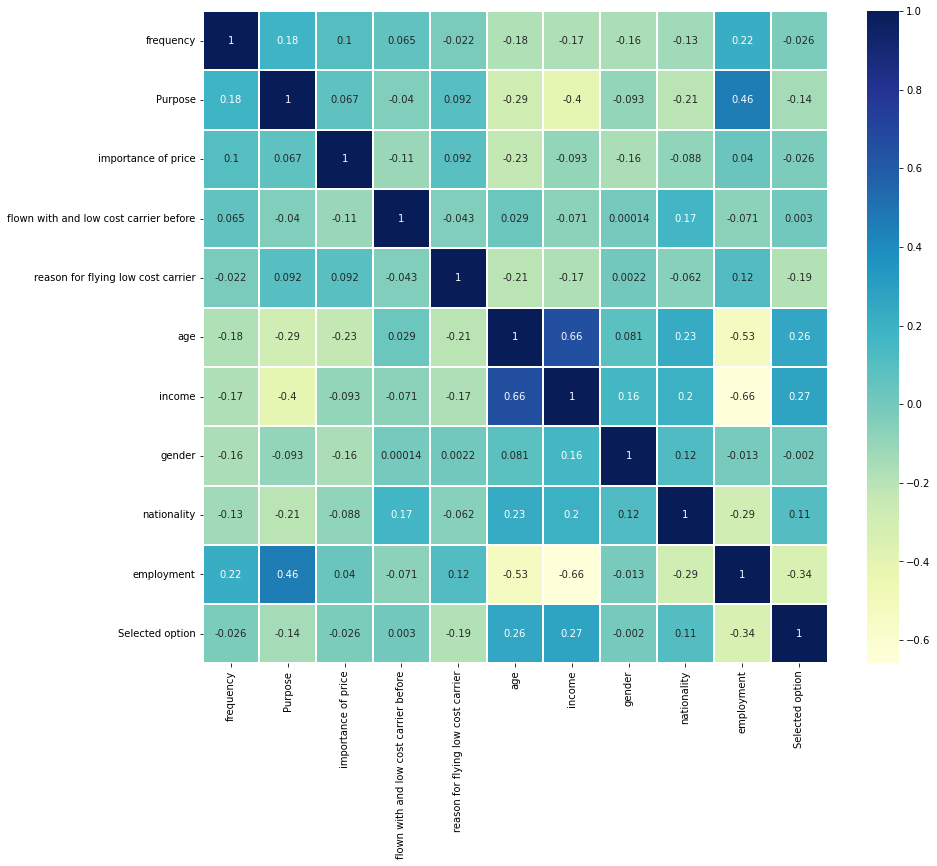

In [21]:
to_plot = data.drop('duration', axis=1)

plt.figure(figsize=(14,12))
sns.heatmap(to_plot.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### Pairplot
- scatterplot of column pairs
- diagonal is a density function
- color represents records with a particular ticket option

In [22]:
# sns.pairplot(data, hue = 'Selected option')
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

### Attribute columns with selection
- scatter plots
- density function
- color per duration

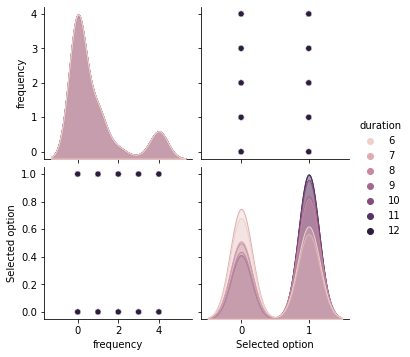

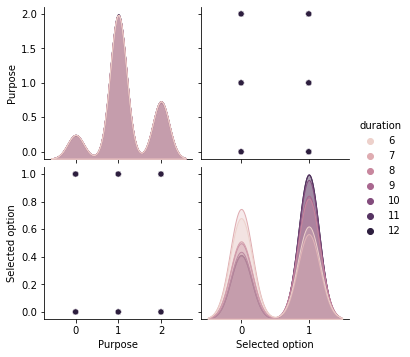

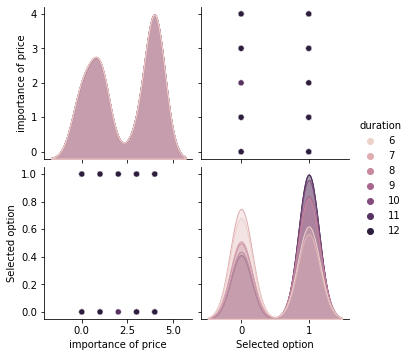

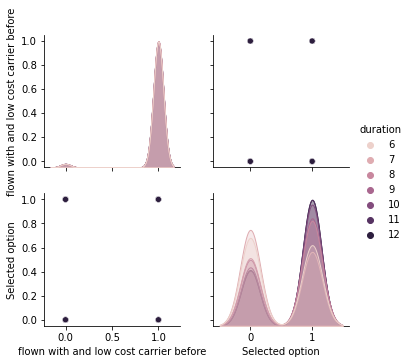

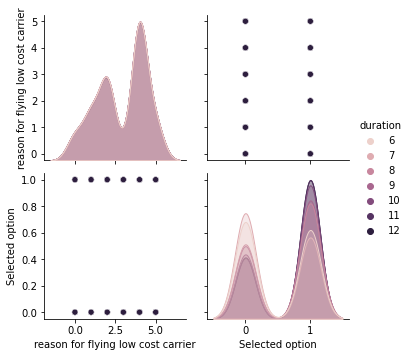

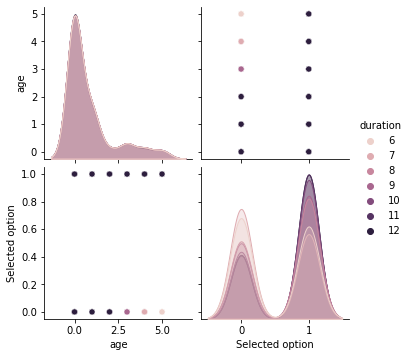

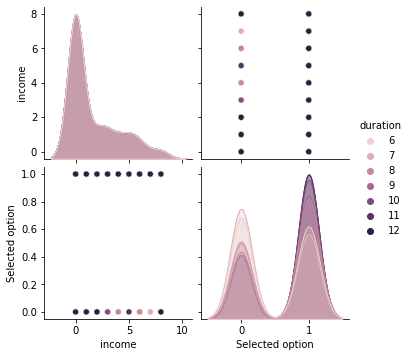

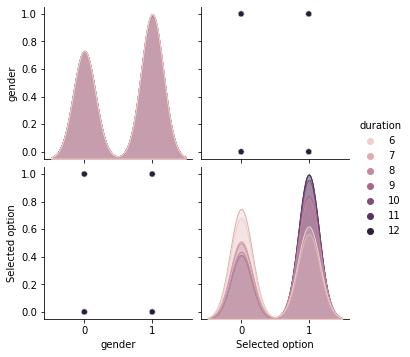

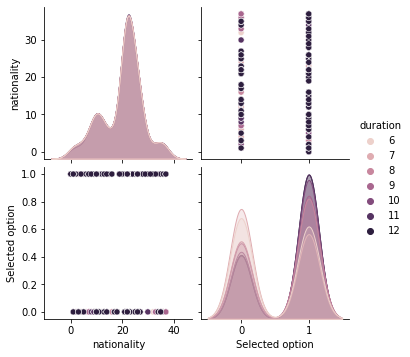

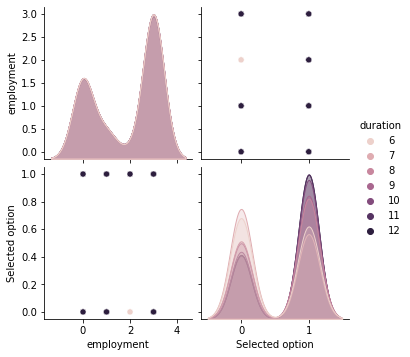

In [23]:
for col in id_columns:
    to_plot = data[[col, 'duration', 'Selected option']]
    # to_plot['duration'] = (data['duration']-data['duration'].min())/(data['duration'].max()-data['duration'].min())
    sns.pairplot(to_plot, hue = 'duration')

### Logistic regression

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
data['duration'] = (data['duration']-data['duration'].min())/(data['duration'].max()-data['duration'].min())
data[['duration', 'Selected option']]

,duration,Selected option
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,1
4,0.0,1
...,...,...
1777,1.0,1
1778,1.0,1
1779,1.0,1
1780,1.0,1


In [26]:
logit = sm.Logit(data['Selected option'], data['duration'])

In [27]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.657286
         Iterations 5


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Selected option   No. Observations:                 1782
Model:                          Logit   Df Residuals:                     1781
Method:                           MLE   Df Model:                            0
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                 0.02310
Time:                        12:27:12   Log-Likelihood:                -1171.3
converged:                       True   LL-Null:                       -1199.0
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.9246      0.085     10.911      0.000       0.759       1.091
==============================================================================
"""